In [596]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 1. How punctual/consistent are the trains in each division from 2020-2024? ##

#####  After running various analyses we can conclude that train lines in Division A (numbered lines) are the most punctual and consistent across the years from 2020-2024. We can observe this trend in our box plot where we observed a higher median in the average additional platform times in Division B (lettered lines) in comparison to Division A. Additionally, the plot depicts more extreme outliers in Division B which suggests that overall this division experiences longer delays in comparison to Division A. This finding is also consistent with our standard deviation values. We learned that Division A had a lower deviation of average additional platform times of 33 minutes in comparison to Division B with an average additional platform time of about 48 minutes. This indicates, once again, that Division A experiences more consistency in arrival time in comparison to Division B. #####

In [597]:
# Importing the dataset
mta = pd.read_csv("../data/MTA_Subway_Customer_Metrics_2020-2024.csv")

In [598]:
# Displaying the first few rows of dataset
mta.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [599]:
# Checking the data types of the columns 
mta.dtypes

month                                 object
division                              object
line                                  object
period                                object
num_passengers                       float64
additional platform time             float64
additional train time                float64
total_apt                            float64
total_att                            float64
over_five_mins                       float64
over_five_mins_perc                  float64
customer journey time performance    float64
dtype: object

In [600]:
# Statistics of dataset and selected rows for EDA
mta.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,2.856000e+03,2856.000000,2856.000000,2.856000e+03,2.856000e+03,2.856000e+03,2856.000000,2856.000000
mean,2.188061e+06,1.251518,0.276823,2.903727e+06,9.339990e+05,3.404776e+05,0.145785,0.854215
std,1.450171e+06,0.454368,0.482434,2.065435e+06,1.258208e+06,2.435442e+05,0.059847,0.059847
min,3.017300e+03,-0.431496,-2.213688,-7.396448e+03,-3.060992e+06,4.630000e+01,0.000112,0.682048
25%,1.091265e+06,0.962920,0.024190,1.284948e+06,5.169300e+03,1.451870e+05,0.107274,0.808143
50%,2.049147e+06,1.223633,0.339261,2.804886e+06,6.263841e+05,3.103827e+05,0.146694,0.853306
75%,3.184311e+06,1.540595,0.598394,4.261219e+06,1.605923e+06,5.129739e+05,0.191857,0.892726
max,8.923406e+06,3.506892,1.584780,1.462646e+07,7.841808e+06,1.274929e+06,0.317952,0.999888


In [601]:
# Checking for null 
mta.isnull().sum()

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

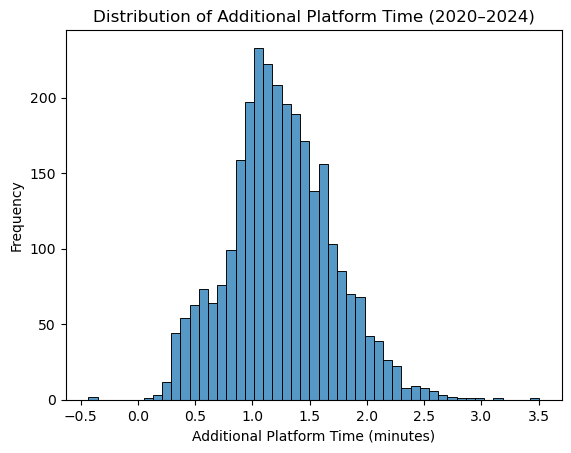

In [602]:
#Creaitng hisotogram for the distribution of additional platform time. 
sns.histplot(data=mta, x="additional platform time")
plt.title("Distribution of Additional Platform Time (2020–2024)")
plt.xlabel("Additional Platform Time (minutes)")
plt.ylabel("Frequency")
plt.show()

This histogram above depicts the distribution of additional platform time(minutes) which represents the average total minutes that commuters wait beyond scheduled train arrival times from 2020 to 2024. We can observe that values range between 0.5 and 2.0 minutes with a strong peak at about 1.0 minute of additional platform time. We can also observe a slightly right skewed distribution which can suggest that shorter delays are common but there are still strong outliers that reveal longer delays are also significant. 

In [603]:
#Preparing for correlation analysis by making 'divisions' binary
mta.loc[mta["division"] == "Division A"] = 1
mta.loc[mta["division"] == "Division B"] = 0

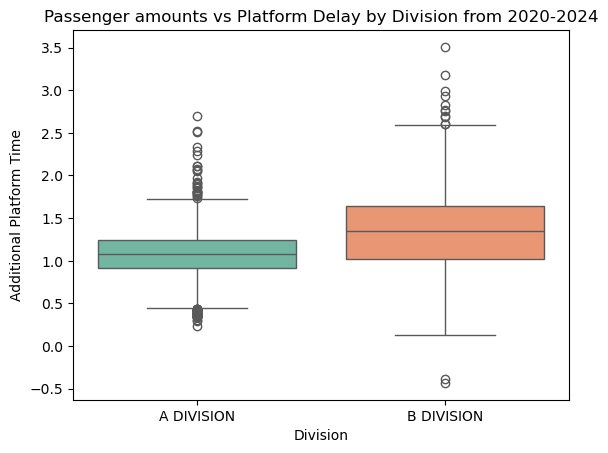

In [604]:
# Creating boxplot to visualize the distribution of additional platform time by division
sns.boxplot(data=mta, x="division", y="additional platform time", hue ="division", palette="Set2")
plt.title("Passenger amounts vs Platform Delay by Division from 2020-2024")
plt.xlabel("Division")
plt.ylabel("Additional Platform Time")
plt.show()

The box plot above reveals the distribution of additional platform time between the two subway divisions. Division B (Lettered lines) depicts a higher median in the average additional platform time in comparison to Division A (Numbered lines) which suggests that trains in Division B are less punctual. We can also observe that Division B exhibits  more extreme outliers which further confirms that this division experiences longer delays in comparison to Division A. Based on this plot, we can confirm that Division B train lines appear to be less consistent and therefore less punctual. 

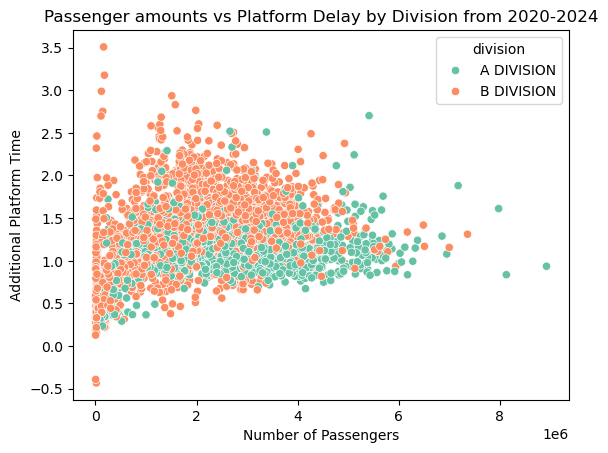

Correlation for Divison Average is 0.2510009938163841


In [605]:
# Creating scatterplot to visualize the relationship between number of passengers and additional platform time
sns.scatterplot(data=mta, x="num_passengers", y="additional platform time", hue='division', palette="Set2")
plt.title("Passenger amounts vs Platform Delay by Division from 2020-2024")
plt.xlabel("Number of Passengers")
plt.ylabel("Additional Platform Time")
plt.show()

# Correlation analysis between number of passengers and additional platform time
cor_passengers_apt = mta["num_passengers"].corr(mta["additional platform time"], method="pearson")
print("Correlation for Divison Average is",cor_passengers_apt)

Pearsons coifficent of .25 depicts a weak positive correlation indicating that there is not a strong effect between number of passengers and average additional platform times from 2020-2024. Our scatter plot indicates that subway lines with more passengers are observed to have an increase in the average additional platform time. However, there may be other factors influencing this delay. 

In [606]:
#Grouping by divisions and observeing spread of additional platform time by standard deviation 
division_std = mta.pivot_table( values="additional platform time", index="division", aggfunc="std")
division_std

,additional platform time
division,
A DIVISION,0.330154
B DIVISION,0.482113


Our standard deviation values reveal that in 2020-2024, Division A had a lower deviation of average additional platform times of 33 minutes in comparison to Division B with an average additional platform time of about 48 minutes. This revealed that Division A experiences more consistency in arrival time. On the other hand, we can observe that in Division B, there was an increase in inconsistent and unpredictable wait times. 

## 2. How punctual/consistent are the trains in each divisions from 2015-2019? ##

##### After running various analyses we can conclude that train lines in Division A (numbered lines) are the most punctual and consistent across the years from 2015-2019. We can observe this trend in our box plot where we observed a higher median in the average additional platform times in Division B (lettered lines) in comparison to Division A. Additionally, the plot depicts more extreme outliers in Division B which suggests that overall this division experiences longer delays in comparison to Division A. This finding is also consistent with our standard deviation values. We learned that Division A had a lower deviation of average additional platform times of 31 minutes in comparison to Division B with an average additional platform time of about 42 minutes. This indicates, once again, that Division A experiences more consistency in arrival time in comparison to Division B which is similar to the findings for delays between divisions from 2020-2024. #####

In [607]:
# Importing the dataset
mta_2= pd.read_csv("../data/MTA_Subway_Customer_Metrics__2015-2019.csv")

In [608]:
# Displaying the first few rows of dataset
mta_2.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2015-01-01,A DIVISION,1,peak,5170116.8,1.371438,0.825562,7090492.655,4268251.636,580364.0,0.112254,0.887746
1,2015-01-01,A DIVISION,1,offpeak,5442987.9,0.913304,0.667314,4971100.611,3632181.629,488584.7,0.089764,0.910236
2,2015-01-01,A DIVISION,2,offpeak,4647297.0,1.084853,1.258279,5041633.115,5847597.552,812798.4,0.174897,0.825103
3,2015-01-01,A DIVISION,2,peak,4719248.8,1.099684,1.419205,5189680.783,6697579.942,839705.4,0.177932,0.822068
4,2015-01-01,A DIVISION,3,offpeak,3602657.1,0.686007,0.856340,2471447.105,3085097.627,368404.9,0.102259,0.897741


In [609]:
#Statistics of dataset for EDA
mta_2.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,2.048000e+03,2048.000000,2048.000000,2.048000e+03,2.048000e+03,2.048000e+03,2048.000000,2048.000000
mean,4.193019e+06,1.168018,1.008601,5.100046e+06,4.757603e+06,7.466511e+05,0.167034,0.832966
std,2.078977e+06,0.394890,0.639796,2.829598e+06,3.746292e+06,4.469105e+05,0.071789,0.071789
min,7.697800e+03,0.194635,-0.567987,1.852644e+03,-1.813084e+05,0.000000e+00,0.000000,0.619272
25%,2.749670e+06,0.934494,0.491778,3.110302e+06,1.852306e+06,4.232425e+05,0.118975,0.779055
50%,4.327750e+06,1.165063,0.973081,5.341377e+06,4.132112e+06,7.602639e+05,0.171970,0.828030
75%,5.639599e+06,1.384977,1.452113,6.904558e+06,7.000588e+06,1.057432e+06,0.220945,0.881025
max,1.018307e+07,2.941971,3.048787,1.858170e+07,1.879770e+07,2.326756e+06,0.380728,1.000000


In [610]:
# Checking for null 
mta_2.isnull().sum()

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

In [611]:
#Preparing for correlation analysis by making 'divisions' binary
mta_2.loc[mta_2["division"] == "Division A"] = 1
mta_2.loc[mta_2["division"] == "Division B"] = 0

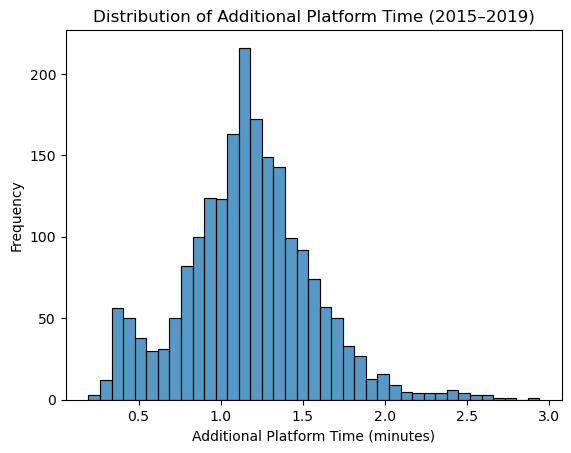

In [612]:
#Creating histogram for the distribution of additional platform time in 2015-2019.
sns.histplot(data=mta_2, x="additional platform time")
plt.title("Distribution of Additional Platform Time (2015–2019)")
plt.xlabel("Additional Platform Time (minutes)")
plt.ylabel("Frequency")
plt.show()

This histogram above depicts the distribution of additional platform time(minutes) which represents the average total minutes that commuters wait beyond scheduled train arrival times from 2015 to 2019. We can observe that values range between 0.3 and 1.5 minutes with a strong peak at about 1.3  minutes of additional platform time. We can also observe a right skewed distribution which can suggest that shorter delays are common but there are still strong outliers that reveal longer delays are also significant.

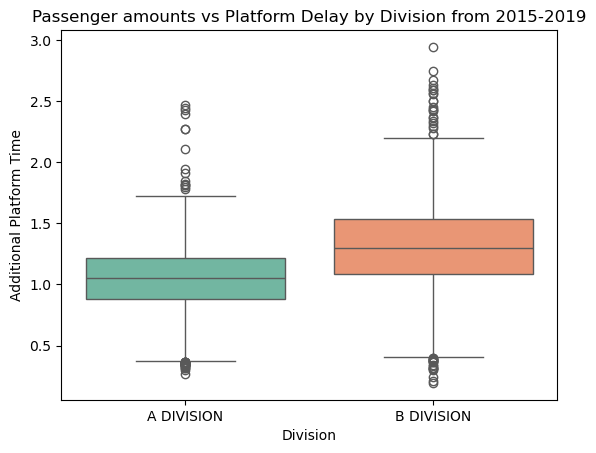

In [613]:
# Creating boxplot for the distribution of division by additional platform time
sns.boxplot(data=mta_2, x="division", y="additional platform time", hue ="division", palette="Set2")
plt.title("Passenger amounts vs Platform Delay by Division from 2015-2019")
plt.xlabel("Division")
plt.ylabel("Additional Platform Time")
plt.show()

The box plot above reveals the distribution of additional platform time between the two subway divisions. Division B (lettered lines) depicts a higher median in additional platform time in comparison to Division A (numbered lines) which suggests that trains in Division B are less punctual. We can also observe that Division B and A exhibit more extreme outliers which can further indicate that both divisions are experiencing longer delays overall. Based on this plot, we can still observe that Division B train lines appear to be less consistent and can further explore the outliers of Division A to conclude its consistency and punctuality. 

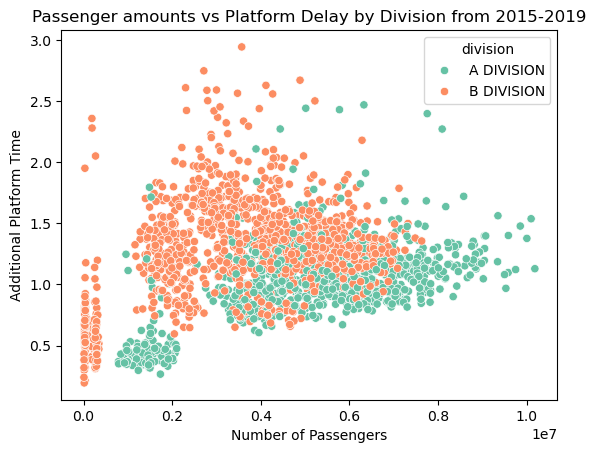

Correlation for Divison Average is 0.24681024896429124


In [614]:
#Creating scatterplot to visualize the relationship between number of passengers and additional platform time
sns.scatterplot(data=mta_2, x="num_passengers", y="additional platform time", hue='division', palette="Set2")
plt.title("Passenger amounts vs Platform Delay by Division from 2015-2019")
plt.xlabel("Number of Passengers")
plt.ylabel("Additional Platform Time")
plt.show()

# Correlation analysis bewtween number of passengers and additional platform time
cor_pass_apt_2 = mta_2["num_passengers"].corr(mta_2["additional platform time"], method="pearson")
print("Correlation for Divison Average is", cor_pass_apt_2)

The scatter plot above reveals the relationship between the number of passengers and additional platform times based on their divisions ( Division B, Division  A) from 2015-2019. The data points show that both divisions experience a wide spread of delay time that varies in relation to the amount of passengers.  However, Pearson's correlation coefficient of .25 depicts a weak positive correlation between both variables which indicates that there is not a strong relationship among the given variables. To pull conclusions we have to perform further analysis to find the strong influential variable of delays. 

In [615]:
#Grouping by divisions and observeing spread of additional platform time by standard deviation 
division_std_mta2 = mta_2.pivot_table( values="additional platform time", index="division", aggfunc="std")
division_std_mta2

,additional platform time
division,
A DIVISION,0.316574
B DIVISION,0.418568


Our standard deviation values reveal that in 2015-2019, Division A had a lower deviation of average additional platform times of 31 minutes in comparison to Division B with an average additional platform time of about 42 minutes. This revealed that Division A experiences more consistency in arrival time. On the other hand, we can observe that in Division B, there was an increase in inconsistent and unpredictable wait times. 

## 3. How punctual/consistent are the trains in each divisions from 2015-2024? ##

##### For our final analysis, to determine train line consistencies and punctuality, we combined data from 2015-2019 and 2020-2024 to perform various analyses based on divisions A and B. Based on our findings, we can conclude that train lines in Division A (numbered lines) are the most punctual and consistent across the years. This finding is consistent with our standard deviation values. We learned that Division A had a lower deviation of average additional platform times of 32 minutes in comparison to Division B with an average additional platform time of about 46 minutes. This indicates, once again, that Division A experiences more consistency in arrival time in comparison to Division B. #####

In [616]:
#importing the datasets
mta_2020 = pd.read_csv("../data/MTA_Subway_Customer_Metrics_2020-2024.csv")
mta_2015 = pd.read_csv("../data/MTA_Subway_Customer_Metrics__2015-2019.csv")

In [617]:
# Merging the datasets
mta_combined = pd.concat([mta_2020, mta_2015])
mta_combined.to_csv("../data/mta_combined.csv", index=False)

In [618]:
# Displaying the first few rows of the combined dataset
mta_combined.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [619]:
# Checking for missing values in the dataset
mta_combined.isnull().sum() 

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

In [620]:
# Creating a new year column for EDA
mta_combined["month"] = pd.to_datetime(mta_combined["month"])
mta_combined["year"] = mta_combined["month"].dt.year
mta_combined.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance,year
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251,2024
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595,2024
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537,2024
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459,2024
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685,2024


In [621]:
#Preparing for correlation analysis by making 'divisions' binary
mta_combined.loc[mta_combined["division"] == "Division A"] = 1
mta_combined.loc[mta_combined["division"] == "Division B"] = 0

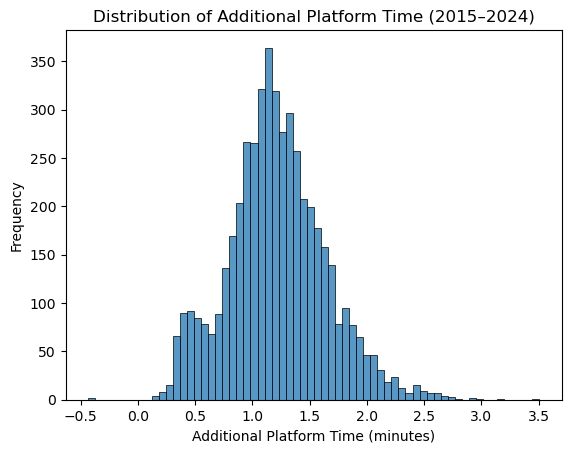

In [622]:
sns.histplot(data=mta_combined, x="additional platform time")
plt.title("Distribution of Additional Platform Time (2015–2024)")
plt.xlabel("Additional Platform Time (minutes)")
plt.ylabel("Frequency")
plt.show()

This histogram depicts the distribution of additional platform time which represents the average total minutes that commuters wait beyond scheduled train arrival times from 2015 to 2024. We can observe that values range between .5 and 2.0 minutes with a strong peak at about 1.0 minute of additional platform time. We can also observe a slightly right skewed distribution which can suggest that shorter delays are common but there are still strong outliers that reveal longer delays are also significant. 

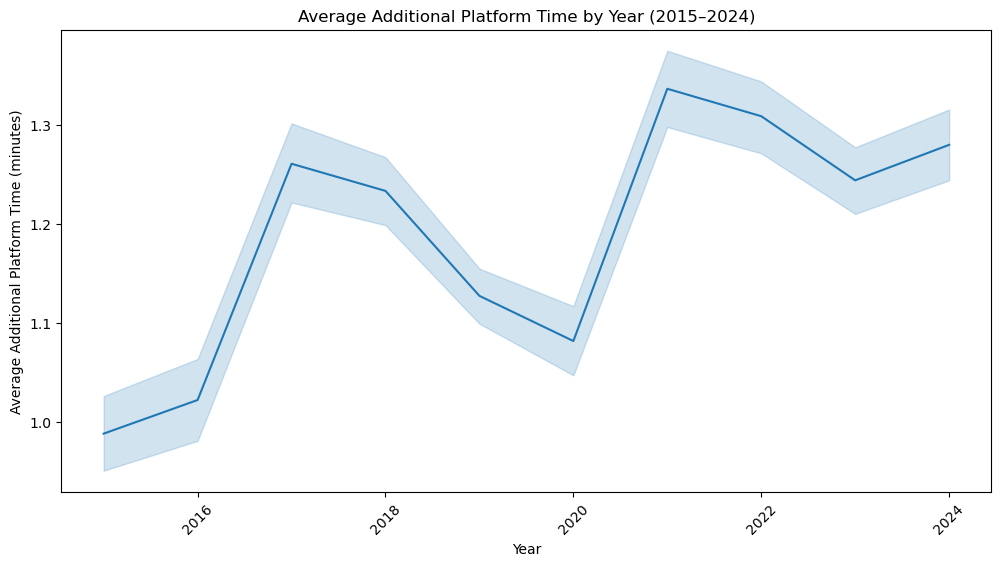

In [623]:
#Line plot for average additional platform time by year
plt.figure(figsize=(12, 6))     
sns.lineplot(data=mta_combined, x="year", y="additional platform time")
plt.title("Average Additional Platform Time by Year (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Average Additional Platform Time (minutes)")
plt.xticks(rotation=45)
plt.show()

The line plot above shows that from 2015-2017 there has been a steady increase in the average additional platform time commuters wait beyond scheduled train times. In the first part of this plot we can observe our first peak around 2017-2018 before experiencing a major decline around 2019-2020. This is significant to note because in this time period, we experienced a global pandemic which left many of our transportation systems frozen. Additionally we can see that after 2020 there is once again a second peak forming which can indicate post-pandemic transportational issues.  After this second peak, we can see that there are higher recorded minutes of additional platform times in comparison to years before which indicates a change in train consistency and punctuality. 

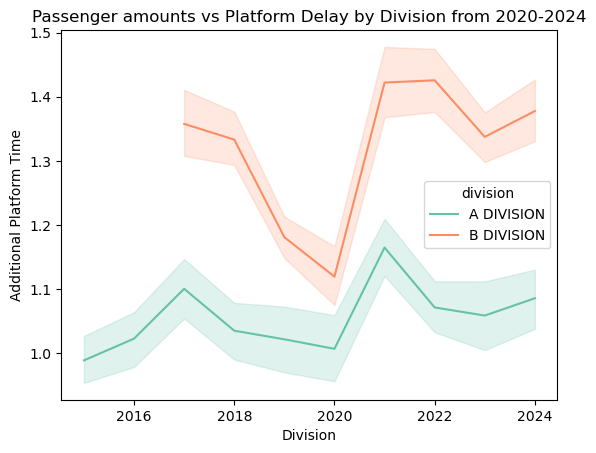

In [624]:
sns.lineplot(data=mta_combined, x="year", y="additional platform time", hue ="division", palette="Set2")
plt.title("Passenger amounts vs Platform Delay by Division from 2020-2024")
plt.xlabel("Division")
plt.ylabel("Additional Platform Time")
plt.show()

The line plot above reveals the different trends observed between the two divisions (Division A, Division B) from 2015-2024. Both divisions depict a decrease around 2020 which is significant due to the timing of the global pandemic occurring in this time period. Additionally, we can observe a larger increase in additional platform times increasing the most for division B. 

In [625]:
#Grouping by divisions and observeing spread of additional platform time by standard deviation 
std_combined = mta_combined.pivot_table( values="additional platform time", index="division", aggfunc="std")
std_combined

,additional platform time
division,
A DIVISION,0.324055
B DIVISION,0.460649


Our standard deviation values reveal that from 2015-2024, Division A still experienced a lower deviation of the average additional platform time of 32 minutes in comparison to Division B with an additional platform time averaging about 46  minutes. This revealed that Division A experiences more consistency in arrival time. On the other hand, we can observe that in Division B, there was an increase in inconsistent delay times. 